In [2]:
import tempfile  # make a temporary directory for files
import os  # interact with the filesystem
import urllib.request  # grad data from internet
import tarfile  # extract files from tar
from subprocess import Popen, PIPE, STDOUT  # enable calling commandline

import matplotlib.pyplot as plt  # manipulate figures
import seaborn as sns  # display results
import pandas as pd   # manipulate tabular data
import nibabel as nib  # load the beta maps in python
from nilearn import plotting  # plot nifti images
import numpy as np

The atlas data came from a recently published parcellation
<https://www.ncbi.nlm.nih.gov/pubmed/28981612>_ in a publically accessible github repository.

In [3]:
# atlas github repo for reference:
"""https://github.com/ThomasYeoLab/CBIG/raw/master/stable_projects/\
brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/"""

data_dir = '/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration'

In [31]:
# https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))


list_files(data_dir)

localizer_beta_series_all_run_exploration/
    dataset_description.json
    derivatives/
        dataset_description.json
        fmriprep/
            desc-aseg_dseg.tsv
            desc-aparcaseg_dseg.tsv
            sub-033.html
            dataset_description.json
            fMRIPrep.sqlite
            logs/
                CITATION.md
                CITATION.html
                CITATION.tex
                CITATION.bib
            sub-033/
                func/
                    sub-033_task-boldRun5_run-1_desc-confounds_regressors.tsv
                    sub-033_task-boldRun5_run-1_desc-confounds_regressors.json
                    sub-033_task-boldRun6_run-1_desc-confounds_regressors.tsv
                    sub-033_task-boldRun6_run-1_desc-confounds_regressors.json
                    sub-033_task-rest_run-1_desc-confounds_regressors.json
                    sub-033_task-boldRun4_run-1_desc-confounds_regressors.tsv
                    sub-033_task-boldRun4_run-1_desc-confou

                figures/
                    sub-022_task-boldRun6_run-1_desc-fieldmap_bold.svg
                    sub-022_task-boldEx2_run-2_desc-bbregister_bold.svg
                    sub-022_task-boldRun6_run-1_desc-bbregister_bold.svg
                    sub-022_task-boldRun6_run-1_desc-sdc_bold.svg
                    sub-022_task-boldRun6_run-1_desc-compcorvar_bold.svg
                    sub-022_task-boldRun6_run-1_desc-confoundcorr_bold.svg
                    sub-022_task-boldRun6_run-1_desc-rois_bold.svg
                    sub-022_dseg.svg
                    sub-022_space-MNI152NLin2009cAsym_T1w.svg
                    sub-022_task-boldRun6_run-1_desc-carpetplot_bold.svg
                    sub-022_task-boldEx_run-1_desc-fieldmap_bold.svg
                    sub-022_desc-reconall_T1w.svg
                    sub-022_task-boldEx2_run-1_desc-fieldmap_bold.svg
                    sub-022_task-boldEx_run-1_desc-bbregister_bold.svg
                    sub-022_task-boldRun2_run-

                figures/
                    sub-020_task-boldRun3_run-1_desc-fieldmap_bold.svg
                    sub-020_task-boldEx_run-1_desc-fieldmap_bold.svg
                    sub-020_task-boldRun2_run-1_desc-fieldmap_bold.svg
                    sub-020_task-boldRun1_run-1_desc-fieldmap_bold.svg
                    sub-020_task-rest_run-1_desc-fieldmap_bold.svg
                    sub-020_task-boldRun5_run-1_desc-fieldmap_bold.svg
                    sub-020_task-boldRun4_run-1_desc-fieldmap_bold.svg
                    sub-020_task-boldEx2_run-1_desc-fieldmap_bold.svg
                    sub-020_task-boldRun6_run-1_desc-fieldmap_bold.svg
                    sub-020_desc-reconall_T1w.svg
                    sub-020_task-boldRun5_run-1_desc-bbregister_bold.svg
                    sub-020_task-boldRun1_run-1_desc-bbregister_bold.svg
                    sub-020_task-boldEx_run-1_desc-bbregister_bold.svg
                    sub-020_task-rest_run-1_desc-bbregister_bold.svg
       

                    sub-038_task-boldRun1_run-1_desc-confoundcorr_bold.svg
                    sub-038_task-boldEx_run-1_desc-rois_bold.svg
                    sub-038_task-boldEx_run-1_desc-compcorvar_bold.svg
                    sub-038_task-boldEx_run-1_desc-confoundcorr_bold.svg
                    sub-038_task-boldEx2_run-1_desc-compcorvar_bold.svg
                    sub-038_task-boldEx2_run-1_desc-confoundcorr_bold.svg
                    sub-038_task-boldEx2_run-1_desc-rois_bold.svg
                    sub-038_space-MNI152NLin2009cAsym_T1w.svg
                    sub-038_task-boldRun6_run-1_desc-carpetplot_bold.svg
                    sub-038_task-rest_run-1_desc-carpetplot_bold.svg
                    sub-038_task-boldRun4_run-1_desc-carpetplot_bold.svg
                    sub-038_task-boldRun5_run-1_desc-carpetplot_bold.svg
                    sub-038_task-boldRun1_run-1_desc-carpetplot_bold.svg
                    sub-038_task-boldRun2_run-1_desc-carpetplot_bold.svg
        

                func/
                    sub-049_task-rest_run-1_desc-confounds_regressors.tsv
                    sub-049_task-rest_run-1_desc-confounds_regressors.json
                    sub-049_task-boldRun6_run-1_desc-confounds_regressors.tsv
                    sub-049_task-boldRun6_run-1_desc-confounds_regressors.json
                    sub-049_task-boldRun5_run-1_desc-confounds_regressors.tsv
                    sub-049_task-boldRun5_run-1_desc-confounds_regressors.json
                    sub-049_task-boldRun4_run-1_desc-confounds_regressors.tsv
                    sub-049_task-boldRun4_run-1_desc-confounds_regressors.json
                    sub-049_task-boldRun3_run-1_desc-confounds_regressors.tsv
                    sub-049_task-boldRun3_run-1_desc-confounds_regressors.json
                    sub-049_task-boldRun2_run-1_desc-confounds_regressors.tsv
                    sub-049_task-boldRun2_run-1_desc-confounds_regressors.json
                    sub-049_task-boldRun1_ru

                    sub-058_task-rest_run-1_space-MNI152NLin2009cAsym_boldref.nii.gz
                    sub-058_task-boldRun5_run-1_space-MNI152NLin2009cAsym_boldref.nii.gz
                    sub-058_task-boldRun1_run-1_space-MNI152NLin2009cAsym_boldref.nii.gz
                    sub-058_task-boldRun2_run-1_space-MNI152NLin2009cAsym_boldref.nii.gz
                    sub-058_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
                    sub-058_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.json
                    sub-058_task-boldRun4_run-1_space-MNI152NLin2009cAsym_boldref.nii.gz
                    sub-058_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
                    sub-058_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.json
                    sub-058_task-boldEx_run-1_space-MNI152NLin2009cAsym_boldref.nii.gz
                    sub-058_task-boldEx2_run-1_space-MNI152NLin2009cAsym_desc-prepro

                    sub-068_task-boldRun2_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-068_task-boldRun1_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-068_task-boldRun1_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-068_task-boldRun1_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
                    sub-068_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-068_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-068_task-boldRun1_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
                    sub-068_task-boldEx2_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-068_task-boldEx2_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-068_task-boldEx2_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
                    sub-068

            sub-076/
                anat/
                    sub-076_from-fsnative_to-T1w_mode-image_xfm.txt
                    sub-076_from-T1w_to-fsnative_mode-image_xfm.txt
                    sub-076_desc-preproc_T1w.nii.gz
                    sub-076_desc-preproc_T1w.json
                    sub-076_desc-aparcaseg_dseg.nii.gz
                    sub-076_desc-aseg_dseg.nii.gz
                    sub-076_desc-brain_mask.nii.gz
                    sub-076_desc-brain_mask.json
                    sub-076_label-CSF_probseg.nii.gz
                    sub-076_label-GM_probseg.nii.gz
                    sub-076_label-WM_probseg.nii.gz
                    sub-076_dseg.nii.gz
                    sub-076_hemi-L_pial.surf.gii
                    sub-076_hemi-L_smoothwm.surf.gii
                    sub-076_hemi-R_midthickness.surf.gii
                    sub-076_hemi-L_inflated.surf.gii
                    sub-076_hemi-R_inflated.surf.gii
                    sub-076_hemi-R_pial.surf.gii
   

                    sub-084_space-MNI152NLin2009cAsym_desc-brain_mask.json
                    sub-084_space-MNI152NLin2009cAsym_dseg.nii.gz
                func/
                    sub-084_task-boldRun6_run-1_desc-confounds_regressors.tsv
                    sub-084_task-boldRun6_run-1_desc-confounds_regressors.json
                    sub-084_task-boldRun5_run-1_desc-confounds_regressors.tsv
                    sub-084_task-boldRun5_run-1_desc-confounds_regressors.json
                    sub-084_task-rest_run-1_desc-confounds_regressors.tsv
                    sub-084_task-rest_run-1_desc-confounds_regressors.json
                    sub-084_task-boldRun4_run-1_desc-confounds_regressors.tsv
                    sub-084_task-boldRun4_run-1_desc-confounds_regressors.json
                    sub-084_task-boldRun3_run-1_desc-confounds_regressors.tsv
                    sub-084_task-boldRun3_run-1_desc-confounds_regressors.json
                    sub-084_task-boldRun2_run-1_desc-confoun

            sub-094/
                anat/
                    sub-094_from-fsnative_to-T1w_mode-image_xfm.txt
                    sub-094_from-T1w_to-fsnative_mode-image_xfm.txt
                    sub-094_desc-preproc_T1w.nii.gz
                    sub-094_desc-preproc_T1w.json
                    sub-094_desc-aparcaseg_dseg.nii.gz
                    sub-094_desc-aseg_dseg.nii.gz
                    sub-094_desc-brain_mask.nii.gz
                    sub-094_desc-brain_mask.json
                    sub-094_label-CSF_probseg.nii.gz
                    sub-094_label-GM_probseg.nii.gz
                    sub-094_label-WM_probseg.nii.gz
                    sub-094_dseg.nii.gz
                    sub-094_hemi-L_smoothwm.surf.gii
                    sub-094_hemi-R_smoothwm.surf.gii
                    sub-094_hemi-L_pial.surf.gii
                    sub-094_hemi-L_inflated.surf.gii
                    sub-094_hemi-R_inflated.surf.gii
                    sub-094_hemi-R_midthickness.surf.gii

            sub-103/
                anat/
                    sub-103_from-fsnative_to-T1w_mode-image_xfm.txt
                    sub-103_from-T1w_to-fsnative_mode-image_xfm.txt
                    sub-103_desc-preproc_T1w.nii.gz
                    sub-103_desc-preproc_T1w.json
                    sub-103_desc-aparcaseg_dseg.nii.gz
                    sub-103_desc-aseg_dseg.nii.gz
                    sub-103_desc-brain_mask.nii.gz
                    sub-103_desc-brain_mask.json
                    sub-103_label-CSF_probseg.nii.gz
                    sub-103_label-GM_probseg.nii.gz
                    sub-103_label-WM_probseg.nii.gz
                    sub-103_dseg.nii.gz
                    sub-103_hemi-L_smoothwm.surf.gii
                    sub-103_hemi-R_smoothwm.surf.gii
                    sub-103_hemi-R_inflated.surf.gii
                    sub-103_hemi-R_pial.surf.gii
                    sub-103_hemi-L_pial.surf.gii
                    sub-103_hemi-R_midthickness.surf.gii
   

            sub-112/
                anat/
                    sub-112_from-fsnative_to-T1w_mode-image_xfm.txt
                    sub-112_from-T1w_to-fsnative_mode-image_xfm.txt
                    sub-112_desc-preproc_T1w.nii.gz
                    sub-112_desc-preproc_T1w.json
                    sub-112_desc-aparcaseg_dseg.nii.gz
                    sub-112_desc-aseg_dseg.nii.gz
                    sub-112_desc-brain_mask.nii.gz
                    sub-112_desc-brain_mask.json
                    sub-112_label-CSF_probseg.nii.gz
                    sub-112_label-GM_probseg.nii.gz
                    sub-112_label-WM_probseg.nii.gz
                    sub-112_dseg.nii.gz
                    sub-112_hemi-R_smoothwm.surf.gii
                    sub-112_hemi-L_midthickness.surf.gii
                    sub-112_hemi-R_midthickness.surf.gii
                    sub-112_hemi-R_inflated.surf.gii
                    sub-112_hemi-L_smoothwm.surf.gii
                    sub-112_hemi-R_pial.surf

                                        _atlas_corr_node3/
                                            _0xbd1fd629bbc5336a08aa1026d860a31f.json
                                            _node.pklz
                                            _inputs.pklz
                                            desc-W_correlation.tsv
                                            desc-W_correlation.svg
                                            result__atlas_corr_node3.pklz
                                            _report/
                                                report.rst
                            b7e9f920cbc6b6437a6e29a1165888a054e397fe/
                                atlas_corr_node/
                                    _node.pklz
                                    _inputs.pklz
                                    result_atlas_corr_node.pklz
                                    _0x1afbb902a36bf565efd51da84e826269.json
                                    _report/
                       

                                        _report/
                                            report.rst
                            ds_correlation_matrix/
                                _node.pklz
                                _inputs.pklz
                                result_ds_correlation_matrix.pklz
                                _0x05dae8e860a671797a4968b01151e7b0.json
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_correlation_matrix0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix0.pklz
                                        _0xc65206d3061716fe497ead23b9a83eaa.json
                                        _report/
                                            report.rst
                                    _ds_correlation_matrix1/
  

                                    _ds_correlation_fig3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig3.pklz
                                        _0xfd20936bbae061e24a126b5ff2a1e356.json
                                        _report/
                                            report.rst
                            ds_correlation_matrix/
                                _node.pklz
                                _inputs.pklz
                                result_ds_correlation_matrix.pklz
                                _0x9813c8c5879e776237b2e0a8ae0f1f43.json
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_correlation_matrix0/
                                        _node.pklz
                                        _inputs.pklz
        

                                        _report/
                                            report.rst
                                    _ds_correlation_fig3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig3.pklz
                                        _0x0ce8f9f44468759bbf382feb6e36f2cc.json
                                        _report/
                                            report.rst
                            ds_correlation_matrix/
                                _node.pklz
                                _inputs.pklz
                                result_ds_correlation_matrix.pklz
                                _0x4ea0a1dfa09d1c8650be2cd951075362.json
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_correlation_matrix0/
        

                        94fba9355e7e4fb5699c193d602d63105bdf6458/
                            ds_betaseries_file/
                                _node.pklz
                                _inputs.pklz
                                result_ds_betaseries_file.pklz
                                _0x96c0e65217cf73d01816fc0b7a5a352d.json
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_betaseries_file0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file0.pklz
                                        _0x4a57a03408393f2777a77c5d59287cf9.json
                                        _report/
                                            report.rst
                                    _ds_betaseries_file1/
                                        _node.pklz
    

                                    _report/
                                        report.rst
                        18344970ef48dfc7b4481232399733b13ac19fdd/
                            ds_betaseries_file/
                                _node.pklz
                                _inputs.pklz
                                result_ds_betaseries_file.pklz
                                _0xe02c5c31b7246d69be8432adbf915899.json
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_betaseries_file0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file0.pklz
                                        _0x439701adab8f92b39a7312aadd23f99e.json
                                        _report/
                                            report.rst
                 

                                mapflow/
                                    _censor_volumes0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes0.pklz
                                        _0x3a5292fe696ad8f82ebebb78c14f4f13.json
                                        _report/
                                            report.rst
                                    _censor_volumes1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes1.pklz
                                        _0x541350545259928023ee218dd7e26731.json
                                        _report/
                                            report.rst
                                    _censor_volumes2/
                                        _node.pklz
                              

                                            _report/
                                                report.rst
                                        _atlas_corr_node1/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-S_correlation.tsv
                                            desc-S_correlation.svg
                                            result__atlas_corr_node1.pklz
                                            _0x55029e147403fd1718634802af38514a.json
                                            _report/
                                                report.rst
                                        _atlas_corr_node2/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-W_correlation.tsv
                                            desc-W_correlation.svg
       

                                        _report/
                                            report.rst
                                    _ds_betaseries_file3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file3.pklz
                                        _0x71f4e877554ecf58dbd4e007950bc2a5.json
                                        _report/
                                            report.rst
                            censor_volumes/
                                _node.pklz
                                _inputs.pklz
                                result_censor_volumes.pklz
                                _0xd841e92a9262a620b92f8b1b650be81a.json
                                _report/
                                    report.rst
                                mapflow/
                                    _censor_volumes0/
                             

                                        _report/
                                            report.rst
                                    _ds_betaseries_file3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file3.pklz
                                        _0x188473df70554688b58bab2088645954.json
                                        _report/
                                            report.rst
                            censor_volumes/
                                _node.pklz
                                _inputs.pklz
                                result_censor_volumes.pklz
                                _0xf138f8d06ef030d7e50558b80ebd41bb.json
                                _report/
                                    report.rst
                                mapflow/
                                    _censor_volumes0/
                             

                                        _atlas_corr_node3/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-W_correlation.tsv
                                            desc-W_correlation.svg
                                            result__atlas_corr_node3.pklz
                                            _0x786c0aaa88b37e76962b1f2cab409129.json
                                            _report/
                                                report.rst
                            82dd254f70ecddf425108c7503af963a3d0c0477/
                                atlas_corr_node/
                                    _node.pklz
                                    _inputs.pklz
                                    result_atlas_corr_node.pklz
                                    _0xaca3747d4b8805c443eb51b37ed72d2c.json
                                    _report/
                       

                                        _report/
                                            report.rst
                                    _ds_betaseries_file2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file2.pklz
                                        _0x05977fb2085d7258f2c51830ea0f6c4c.json
                                        _report/
                                            report.rst
                                    _ds_betaseries_file3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file3.pklz
                                        _0x2f4a1bccceb59c55ff3005249969fb78.json
                                        _report/
                                            report.rst
                            censor_volumes/
            

                                    _ds_betaseries_file3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file3.pklz
                                        _0x32f44d0839aef497418845c85c25bccc.json
                                        _report/
                                            report.rst
                            censor_volumes/
                                _node.pklz
                                _inputs.pklz
                                result_censor_volumes.pklz
                                _0x7390e7ce686e314119ffdb66cfeeebc3.json
                                _report/
                                    report.rst
                                mapflow/
                                    _censor_volumes0/
                                        _node.pklz
                                        _inputs.pklz
                             

                                    _censor_volumes1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes1.pklz
                                        _0xe4cb26c07cc661c2385a618b159db79a.json
                                        _report/
                                            report.rst
                                    _censor_volumes2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes2.pklz
                                        _0xf818a47f516f19c72741054835b15280.json
                                        _report/
                                            report.rst
                                    _censor_volumes3/
                                        _node.pklz
                                        _inputs.pklz
                  

                                        _report/
                                            report.rst
                                    _ds_betaseries_file3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file3.pklz
                                        _0xc93d7509b2c2c51020d4992d4a055e65.json
                                        _report/
                                            report.rst
                            censor_volumes/
                                _node.pklz
                                _inputs.pklz
                                result_censor_volumes.pklz
                                _0xf0805e774aa65b4301f76a2e6a68f9d5.json
                                _report/
                                    report.rst
                                mapflow/
                                    _censor_volumes0/
                             

                                            _report/
                                                report.rst
                                        _atlas_corr_node2/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-S_correlation.tsv
                                            desc-S_correlation.svg
                                            result__atlas_corr_node2.pklz
                                            _0xfc36a72c74749ae8b33a214afcdde20c.json
                                            _report/
                                                report.rst
                                        _atlas_corr_node3/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-W_correlation.tsv
                                            desc-W_correlation.svg
       

                                    _report/
                                        report.rst
                            f46cde024a2a8f9dd82012cfcfe4cc3adcdff97c/
                                betaseries_node/
                                    _node.pklz
                                    _inputs.pklz
                                    desc-residuals_bold.nii.gz
                                    desc-E_betaseries.nii.gz
                                    desc-N_betaseries.nii.gz
                                    desc-W_betaseries.nii.gz
                                    desc-S_betaseries.nii.gz
                                    result_betaseries_node.pklz
                                    _0x6830518e2abcaff773745f297f1ffe9a.json
                                    desc-S_betaseries_censored.nii.gz
                                    desc-N_betaseries_censored.nii.gz
                                    desc-W_betaseries_censored.nii.gz
                               

                                        _report/
                                            report.rst
                                    _ds_correlation_fig3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig3.pklz
                                        _0x22a4afe34f5e2f0d0065aa6feced13a9.json
                                        _report/
                                            report.rst
                            ds_correlation_matrix/
                                _node.pklz
                                _inputs.pklz
                                result_ds_correlation_matrix.pklz
                                _0x772cdb74f9bf9137dca0e2477dca38f8.json
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_correlation_matrix0/
        

                                            _report/
                                                report.rst
                                        _atlas_corr_node3/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-S_correlation.tsv
                                            desc-S_correlation.svg
                                            result__atlas_corr_node3.pklz
                                            _0x5671f8749d4e73099886cb154c84b313.json
                                            _report/
                                                report.rst
                        a4e9626318efc4eba0ccc3dc4ece6de4d0f13645/
                            ds_betaseries_file/
                                _node.pklz
                                _inputs.pklz
                                result_ds_betaseries_file.pklz
                                _0x20b16be1635b

                                        _report/
                                            report.rst
                                    _ds_correlation_matrix1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix1.pklz
                                        _0xefcd19fb127f93bf0722b3836ad4f9fc.json
                                        _report/
                                            report.rst
                                    _ds_correlation_matrix2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix2.pklz
                                        _0x7b49b4010c594f155ad914235eb3dd39.json
                                        _report/
                                            report.rst
                                    _ds_corr

                                        _report/
                                            report.rst
                                    _ds_correlation_matrix1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix1.pklz
                                        _0x569420cc931ff75a132b94feea3af359.json
                                        _report/
                                            report.rst
                                    _ds_correlation_matrix2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix2.pklz
                                        _0xa72677765e90dcd0175ffb986d42547b.json
                                        _report/
                                            report.rst
                                    _ds_corr

                                            _report/
                                                report.rst
                            9a2f1886075194cd8ea5580fdcdb75964ee38fed/
                                atlas_corr_node/
                                    _node.pklz
                                    _inputs.pklz
                                    result_atlas_corr_node.pklz
                                    _0x10677214c432c02066815e2b4a7ed6d5.json
                                    _report/
                                        report.rst
                                    mapflow/
                                        _atlas_corr_node0/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-N_correlation.tsv
                                            desc-N_correlation.svg
                                            result__atlas_corr_node0.pklz
            

                                    _ds_correlation_fig2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig2.pklz
                                        _0x16a0fc9b6f91da887742fdd913fd6f02.json
                                        _report/
                                            report.rst
                                    _ds_correlation_fig3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig3.pklz
                                        _0x25e63f7e04a7176e7c204b8a86dc0acf.json
                                        _report/
                                            report.rst
                            ds_correlation_matrix/
                                _node.pklz
                                _inputs.pklz
                     

                                        _report/
                                            report.rst
                                    _ds_betaseries_file3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file3.pklz
                                        _0xe8e56b96cdbf0473aee49e903b862256.json
                                        _report/
                                            report.rst
                            censor_volumes/
                                _node.pklz
                                _inputs.pklz
                                result_censor_volumes.pklz
                                _0x586215c7aa3e22f4f6e35ac4131caf1a.json
                                _report/
                                    report.rst
                                mapflow/
                                    _censor_volumes0/
                             

                                atlas_corr_node/
                                    _node.pklz
                                    _inputs.pklz
                                    result_atlas_corr_node.pklz
                                    _0x32df86b0e46fe1199c469a8b82a40569.json
                                    _report/
                                        report.rst
                                    mapflow/
                                        _atlas_corr_node0/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-E_correlation.tsv
                                            desc-E_correlation.svg
                                            result__atlas_corr_node0.pklz
                                            _0xc8fe63cd5217f2dab5e6d76450c4d78b.json
                                            _report/
                                                report.r

                                        _report/
                                            report.rst
                                    _ds_correlation_fig1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig1.pklz
                                        _0xeed2f61b531d8a05ff05a1a3b217136e.json
                                        _report/
                                            report.rst
                                    _ds_correlation_fig2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig2.pklz
                                        _0x9fddb08dc97acda7d8639a802744e1fa.json
                                        _report/
                                            report.rst
                                    _ds_correlation_fig3

                                        _report/
                                            report.rst
                                    _censor_volumes2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes2.pklz
                                        _0xac79eeaa942a4e566e26080d388a23bc.json
                                        _report/
                                            report.rst
                                    _censor_volumes3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes3.pklz
                                        _0xd39a8a76b2deb9d2701db437d1e435e5.json
                                        _report/
                                            report.rst
                            check_beta_series_list/
                    

                                            _report/
                                                report.rst
                            03dcaf88f0b276841c682678c2fe27abd30b8516/
                                atlas_corr_node/
                                    _node.pklz
                                    _inputs.pklz
                                    result_atlas_corr_node.pklz
                                    _0x848d8cb2d3513a3fa792d509abf8ead7.json
                                    _report/
                                        report.rst
                                    mapflow/
                                        _atlas_corr_node0/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-S_correlation.tsv
                                            desc-S_correlation.svg
                                            result__atlas_corr_node0.pklz
            

                                    _ds_correlation_matrix1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix1.pklz
                                        _0x73668b46e3d24f9fb64425afa2e264df.json
                                        _report/
                                            report.rst
                                    _ds_correlation_matrix2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix2.pklz
                                        _0x122c3b70759c1b1f333b706b4aadf86b.json
                                        _report/
                                            report.rst
                                    _ds_correlation_matrix3/
                                        _node.pklz
                                    

                                        _report/
                                            report.rst
                        correlation_wf/
                            0d86280f8fb32a154d392af674b4bd30aa4ad673/
                                atlas_corr_node/
                                    _node.pklz
                                    _inputs.pklz
                                    result_atlas_corr_node.pklz
                                    _0xcb65a6843feb1bad07641c40757880d4.json
                                    _report/
                                        report.rst
                                    mapflow/
                                        _atlas_corr_node0/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-N_correlation.tsv
                                            desc-N_correlation.svg
                                            result__at

                                _report/
                                    report.rst
                                mapflow/
                                    _ds_correlation_fig0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig0.pklz
                                        _0x2642a766452f3598933eedfcbaa60961.json
                                        _report/
                                            report.rst
                                    _ds_correlation_fig1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig1.pklz
                                        _0xd467f42548dc9756408b44eec6e34d60.json
                                        _report/
                                            report.rst
                               

                                    _report/
                                        report.rst
                                    mapflow/
                                        _atlas_corr_node0/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-N_correlation.tsv
                                            desc-N_correlation.svg
                                            result__atlas_corr_node0.pklz
                                            _0x59ee3aac28092e71da8aa95c8fa866eb.json
                                            _report/
                                                report.rst
                                        _atlas_corr_node1/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-E_correlation.tsv
                                            d

                            check_beta_series_list/
                                _node.pklz
                                _inputs.pklz
                                result_check_beta_series_list.pklz
                                _0xcc8184109eab176b320892487a04c1b9.json
                                _report/
                                    report.rst
                            ds_correlation_fig/
                                _node.pklz
                                _inputs.pklz
                                result_ds_correlation_fig.pklz
                                _0xe0ed482991c079908c67162660a15b23.json
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_correlation_fig0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig0.p

                                        _report/
                                            report.rst
                            censor_volumes/
                                _node.pklz
                                _inputs.pklz
                                result_censor_volumes.pklz
                                _0x9abab704464345dc331657f52c6c4a94.json
                                _report/
                                    report.rst
                                mapflow/
                                    _censor_volumes0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes0.pklz
                                        _0xef5b11ef9f5c109402eabc1894f8efd0.json
                                        _report/
                                            report.rst
                                    _censor_volumes1/
                                     

                                            _report/
                                                report.rst
                                        _atlas_corr_node3/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-E_correlation.tsv
                                            desc-E_correlation.svg
                                            result__atlas_corr_node3.pklz
                                            _0x4e4f22f8f5ce8184d431c015f908e7dc.json
                                            _report/
                                                report.rst
                            5dbd8ba9593c1aac212ec3487486bfe1d520f8fb/
                                atlas_corr_node/
                                    _node.pklz
                                    _inputs.pklz
                                    result_atlas_corr_node.pklz
                                 

                                _report/
                                    report.rst
                                mapflow/
                                    _ds_correlation_matrix0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix0.pklz
                                        _0x3e22a587647f067441c1be8f5a91af9d.json
                                        _report/
                                            report.rst
                                    _ds_correlation_matrix1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix1.pklz
                                        _0xa9b1794a699d085dd03ded3d58254326.json
                                        _report/
                                            report.rst
                   

                                    _report/
                                        report.rst
                                    mapflow/
                                        _atlas_corr_node0/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-E_correlation.tsv
                                            desc-E_correlation.svg
                                            result__atlas_corr_node0.pklz
                                            _0x42a68870808808e0669216fe6a7c1e7b.json
                                            _report/
                                                report.rst
                                        _atlas_corr_node2/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-N_correlation.tsv
                                            d

                                        _report/
                                            report.rst
                                    _ds_correlation_matrix2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix2.pklz
                                        _0x05c7dfb6037fff87faec2a8b275ecc32.json
                                        _report/
                                            report.rst
                                    _ds_correlation_matrix3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix3.pklz
                                        _0xf9c218809d76735f43af6e6ae4149fe4.json
                                        _report/
                                            report.rst
        nibetaseries_cortical/
            l

                    sub-022_task-boldRun1_run-1_desc-sdc_bold.svg
                    sub-022_task-boldEx2_run-1_desc-rois_bold.svg
                    sub-022_task-boldEx2_run-1_desc-compcorvar_bold.svg
                    sub-022_task-boldEx2_run-1_desc-confoundcorr_bold.svg
                    sub-022_task-boldEx2_run-1_desc-carpetplot_bold.svg
                    sub-022_task-boldRun5_run-1_desc-compcorvar_bold.svg
                    sub-022_task-boldRun5_run-1_desc-rois_bold.svg
                    sub-022_task-boldRun5_run-1_desc-confoundcorr_bold.svg
                    sub-022_task-boldRun3_run-1_desc-compcorvar_bold.svg
                    sub-022_task-boldRun5_run-1_desc-carpetplot_bold.svg
                    sub-022_task-boldRun3_run-1_desc-rois_bold.svg
                    sub-022_task-boldRun2_run-1_desc-compcorvar_bold.svg
                    sub-022_task-boldRun3_run-1_desc-confoundcorr_bold.svg
                    sub-022_task-boldRun2_run-1_desc-rois_bold.svg
       

    sub-018/
        sub-018_scans.tsv
        anat/
            sub-018_run-1_T1w.json
            sub-018_run-1_T1w.nii.gz
            sub-018_run-1_T2w.json
            sub-018_run-1_T2w.nii.gz
        dwi/
            sub-018_run-1_dwi.bval
            sub-018_run-1_dwi.bvec
            sub-018_run-1_dwi.json
            sub-018_run-1_dwi.nii.gz
            sub-018_run-2_dwi.bval
            sub-018_run-2_dwi.bvec
            sub-018_run-2_dwi.json
            sub-018_run-2_dwi.nii.gz
        fmap/
            sub-018_magnitude1.nii.gz
            sub-018_magnitude2.nii.gz
            sub-018_phasediff.json
            sub-018_phasediff.nii.gz
        func/
            sub-018_task-boldEx2_run-1_bold.json
            sub-018_task-boldEx2_run-1_bold.nii.gz
            sub-018_task-boldEx_run-1_bold.json
            sub-018_task-boldEx_run-1_bold.nii.gz
            sub-018_task-boldRun1_run-1_bold.json
            sub-018_task-boldRun1_run-1_bold.nii.gz
            sub-018_task-boldR

# Manipulate events file so it satifies assumptions

In [6]:
events_file = os.path.join(data_dir,
                        
                           "sub-002",
                           "func",
#                            "sub-043_task-boldRun6_run-1_events.tsv")
                           "sub-002_task-boldEx_run-1_events.tsv")
events_df = pd.read_csv(events_file, sep='\t', na_values="n/a")
# events_df = pd.read_csv(events_file, engine='python', sep=',') 
print(events_df.head())

    onset trial_type  duration
0   1.368          E     4.487
1   6.939          N     3.953
2  12.209          W     3.436
3  17.679          S     4.137
4  23.049          W     2.435


In [7]:
events_df.to_csv(events_file, sep="\t", na_rep="n/a", index=False)

# read atlas file

In [4]:
atlas_txt = os.path.join(data_dir,
                         "derivatives",
                         "data",
#                          "Schaefer2018_100Parcels_17Networks_order.txt")
#                          "HarvardOxford:HarvardOxford-sub-maxprob-thr25-2mm.txt")
                         "AAL3v1.nii.txt")
# atlas_df = pd.read_csv(atlas_txt, sep="\t", header=None)
atlas_df = pd.read_csv(atlas_txt, delim_whitespace=True, header=None)
print(atlas_df.head())

   0                1    2
0  1     Precentral_L  1.0
1  2     Precentral_R  2.0
2  3  Frontal_Sup_2_L  3.0
3  4  Frontal_Sup_2_R  4.0
4  5  Frontal_Mid_2_L  5.0


In [86]:
# colnames = ['index', 'regions']
# atlas_tsv = pd.DataFrame(np.zeros((len(atlas_df), len(colnames))), columns = colnames)

# counter = 1
# for i in range(len(atlas_df)):
#     atlas_tsv.iloc[i,0] = str(counter)
#     atlas_tsv.iloc[i,1] = str.split(atlas_df.iloc[i,0], " ")[1]
#     counter += 1
    
# str_name = data_dir + "/derivatives"+ "/data" + '/AAL3v1.tsv'
# atlas_tsv.to_csv(str_name, sep="\t", index=False)

In [5]:
atlas_df.drop([2, ], axis='columns', inplace=True)
print(atlas_df.head())

   0                1
0  1     Precentral_L
1  2     Precentral_R
2  3  Frontal_Sup_2_L
3  4  Frontal_Sup_2_R
4  5  Frontal_Mid_2_L


In [6]:
atlas_df.rename({0: 'index', 1: 'regions'}, axis='columns', inplace=True)
print(atlas_df.head())

   index          regions
0      1     Precentral_L
1      2     Precentral_R
2      3  Frontal_Sup_2_L
3      4  Frontal_Sup_2_R
4      5  Frontal_Mid_2_L


In [91]:
# atlas_df.replace(regex={'7Networks_(.*)': '\\1'}, inplace=True)
# print(atlas_df.head())

   index                 regions
0      1     1LH_VisCent_ExStr_1
1      2     1LH_VisCent_ExStr_2
2      3   1LH_VisCent_Striate_1
3      4     1LH_VisCent_ExStr_3
4      5  1LH_VisPeri_ExStrInf_1


In [7]:
atlas_tsv = atlas_txt.replace(".txt", ".tsv")
atlas_df.to_csv(atlas_tsv, sep="\t", index=False)

# Run nibs

In [ ]:
out_dir = os.path.join(data_dir, "derivatives")
work_dir = os.path.join(out_dir, "work")
atlas_mni_file = os.path.join(data_dir,
                              "derivatives",
                              "data",
#                               "Schaefer2018_100Parcels_17Networks_order_FSLMNI152_1mm.nii.gz")
#                              "HarvardOxford-sub-maxprob-thr25-1mm.nii.gz")
                              "AAL3v1.nii.gz")
# --participant-label 002 \
cmd = """\
nibs -c WhiteMatter CSF \
--participant-label 002 \
--estimator lsa \
--hrf-model glover \
-w {work_dir} \
-a {atlas_mni_file} \
-l {atlas_tsv} \
{bids_dir} \
fmriprep   \
{out_dir} \
participant
""".format(atlas_mni_file=atlas_mni_file,
           atlas_tsv=atlas_tsv,
           bids_dir=os.path.join(data_dir),
           out_dir=out_dir,
           work_dir=work_dir)

# Since we cannot run bash commands inside this tutorial
# we are printing the actual bash command so you can see it
# in the output
print("The Example Command:\n", cmd)

# call nibs
p = Popen(cmd, shell=True, stdout=PIPE, stderr=STDOUT)

while True:
    line = p.stdout.readline()
    if not line:
        break
    print(line)

The Example Command:
 nibs -c WhiteMatter CSF --participant-label 002 --estimator lsa --hrf-model glover -w /mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives/work -a /mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives/data/AAL3v1.nii.gz -l /mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives/data/AAL3v1.nii.tsv /mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration fmriprep   /mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration/derivatives participant



In [40]:
list_files(data_dir)

localizer_beta_series_all_run_exploration/
    dataset_description.json
    derivatives/
        dataset_description.json
        fmriprep/
            desc-aseg_dseg.tsv
            desc-aparcaseg_dseg.tsv
            sub-033.html
            dataset_description.json
            fMRIPrep.sqlite
            logs/
                CITATION.md
                CITATION.html
                CITATION.tex
                CITATION.bib
            sub-033/
                func/
                    sub-033_task-boldRun5_run-1_desc-confounds_regressors.tsv
                    sub-033_task-boldRun5_run-1_desc-confounds_regressors.json
                    sub-033_task-boldRun6_run-1_desc-confounds_regressors.tsv
                    sub-033_task-boldRun6_run-1_desc-confounds_regressors.json
                    sub-033_task-rest_run-1_desc-confounds_regressors.json
                    sub-033_task-boldRun4_run-1_desc-confounds_regressors.tsv
                    sub-033_task-boldRun4_run-1_desc-confou

                    sub-022_task-boldRun2_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-022_task-boldRun2_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-022_task-boldRun1_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-022_task-boldRun1_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-022_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-022_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-022_task-boldEx2_run-2_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-022_task-boldEx2_run-2_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-022_task-boldEx2_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.json
                    sub-022_task-boldEx2_run-1_desc-confounds_regressors.json
                    sub-022_task-boldEx2_run-1

                func/
                    sub-020_task-boldRun6_run-1_desc-confounds_regressors.tsv
                    sub-020_task-boldRun6_run-1_desc-confounds_regressors.json
                    sub-020_task-rest_run-1_desc-confounds_regressors.json
                    sub-020_task-boldRun5_run-1_desc-confounds_regressors.tsv
                    sub-020_task-boldRun5_run-1_desc-confounds_regressors.json
                    sub-020_task-boldRun4_run-1_desc-confounds_regressors.tsv
                    sub-020_task-boldRun4_run-1_desc-confounds_regressors.json
                    sub-020_task-boldRun3_run-1_desc-confounds_regressors.tsv
                    sub-020_task-boldRun3_run-1_desc-confounds_regressors.json
                    sub-020_task-boldRun2_run-1_desc-confounds_regressors.tsv
                    sub-020_task-boldRun2_run-1_desc-confounds_regressors.json
                    sub-020_task-boldRun1_run-1_desc-confounds_regressors.tsv
                    sub-020_task-boldRun

            sub-038/
                log/
                    20200501-181022_c66ef459-2a0a-4d4e-80a7-b6a122d0741f/
                        crash-20200501-190637-rwoodry-n4_correct-00cb0f4b-4ca9-4167-868c-ae334fa2125c.txt
                        crash-20200501-192339-rwoodry-autorecon1-e22dc7e2-cf90-47fa-ba9b-424f99f44898.txt
                        crash-20200501-192348-rwoodry-skullstrip_second_pass-1d7e095a-2cb2-4776-88dd-137bb9dc439c.txt
                anat/
                    sub-038_desc-preproc_T1w.nii.gz
                    sub-038_desc-preproc_T1w.json
                    sub-038_from-fsnative_to-T1w_mode-image_xfm.txt
                    sub-038_from-T1w_to-fsnative_mode-image_xfm.txt
                    sub-038_desc-aparcaseg_dseg.nii.gz
                    sub-038_desc-aseg_dseg.nii.gz
                    sub-038_desc-brain_mask.nii.gz
                    sub-038_desc-brain_mask.json
                    sub-038_label-CSF_probseg.nii.gz
                    sub-038_label-GM

                    sub-047_task-boldRun3_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-047_task-rest_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-047_task-rest_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-047_task-boldRun6_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-047_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-047_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-047_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-047_task-boldRun3_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-047_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-047_task-boldRun2_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
                    su

                    sub-057_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-057_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
                    sub-057_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.json
                    sub-057_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-057_task-boldRun3_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-057_task-boldRun3_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
                    sub-057_task-boldRun3_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.json
                    sub-057_task-boldRun1_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-057_task-rest_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-057_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-057_task-b

            sub-066/
                anat/
                    sub-066_from-fsnative_to-T1w_mode-image_xfm.txt
                    sub-066_from-T1w_to-fsnative_mode-image_xfm.txt
                    sub-066_desc-preproc_T1w.json
                    sub-066_desc-brain_mask.json
                    sub-066_hemi-R_midthickness.surf.gii
                    sub-066_hemi-L_midthickness.surf.gii
                    sub-066_hemi-L_inflated.surf.gii
                    sub-066_hemi-R_smoothwm.surf.gii
                    sub-066_hemi-R_pial.surf.gii
                    sub-066_hemi-L_smoothwm.surf.gii
                    sub-066_hemi-L_pial.surf.gii
                    sub-066_hemi-R_inflated.surf.gii
                    sub-066_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5
                    sub-066_from-MNI152NLin2009cAsym_to-T1w_mode-image_xfm.h5
                    sub-066_space-MNI152NLin2009cAsym_desc-preproc_T1w.json
                    sub-066_space-MNI152NLin2009cAsym_desc-brain_m

                    sub-074_task-boldEx2_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.json
                    sub-074_task-boldEx2_run-1_space-MNI152NLin2009cAsym_boldref.nii.gz
                figures/
                    sub-074_task-boldRun3_run-1_desc-fieldmap_bold.svg
                    sub-074_task-boldRun6_run-1_desc-fieldmap_bold.svg
                    sub-074_task-boldEx_run-1_desc-fieldmap_bold.svg
                    sub-074_task-boldRun4_run-1_desc-fieldmap_bold.svg
                    sub-074_task-rest_run-1_desc-fieldmap_bold.svg
                    sub-074_task-boldRun4_run-1_desc-bbregister_bold.svg
                    sub-074_task-boldEx_run-1_desc-bbregister_bold.svg
                    sub-074_task-rest_run-1_desc-bbregister_bold.svg
                    sub-074_task-boldRun3_run-1_desc-bbregister_bold.svg
                    sub-074_task-boldRun6_run-1_desc-bbregister_bold.svg
                    sub-074_dseg.svg
                    sub-074_task-boldRun6_run-

                    sub-082_task-boldRun1_run-1_desc-confoundcorr_bold.svg
                    sub-082_task-boldRun1_run-1_desc-rois_bold.svg
                    sub-082_task-boldEx_run-1_desc-compcorvar_bold.svg
                    sub-082_task-boldEx_run-1_desc-confoundcorr_bold.svg
                    sub-082_task-boldEx2_run-1_desc-compcorvar_bold.svg
                    sub-082_task-boldEx_run-1_desc-rois_bold.svg
                    sub-082_task-boldEx2_run-1_desc-confoundcorr_bold.svg
                    sub-082_task-boldEx2_run-1_desc-rois_bold.svg
                    sub-082_space-MNI152NLin2009cAsym_T1w.svg
                    sub-082_task-boldRun6_run-1_desc-carpetplot_bold.svg
                    sub-082_task-boldRun4_run-1_desc-carpetplot_bold.svg
                    sub-082_task-rest_run-1_desc-carpetplot_bold.svg
                    sub-082_task-boldRun3_run-1_desc-carpetplot_bold.svg
                    sub-082_task-boldRun2_run-1_desc-carpetplot_bold.svg
              

                    sub-092_task-rest_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-092_task-rest_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
                    sub-092_task-rest_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.json
                    sub-092_task-boldRun6_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-092_task-boldRun6_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-092_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-092_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-092_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
                    sub-092_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.json
                    sub-092_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-092_task-bold

                    sub-101_task-rest_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.json
                    sub-101_task-boldRun6_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-101_task-boldRun6_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-101_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-101_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-aseg_dseg.nii.gz
                    sub-101_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
                    sub-101_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.json
                    sub-101_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
                    sub-101_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.json
                    sub-101_task-boldRun3_run-1_space-MNI152NLin2009cAsym_desc-aparcaseg_dseg.nii.gz
                    sub-101_ta

                    sub-110_task-rest_run-1_space-fsaverage5_hemi-L.func.gii
                    sub-110_task-rest_run-1_space-fsaverage5_hemi-R.func.gii
                    sub-110_task-boldRun3_run-1_space-fsaverage5_hemi-R.func.gii
                    sub-110_task-boldRun3_run-1_space-fsaverage5_hemi-L.func.gii
                    sub-110_task-boldEx2_run-1_desc-confounds_regressors.tsv
                    sub-110_task-boldEx2_run-1_desc-confounds_regressors.json
                    sub-110_task-boldRun4_run-1_space-fsaverage5_hemi-L.func.gii
                    sub-110_task-boldRun4_run-1_space-fsaverage5_hemi-R.func.gii
                    sub-110_task-boldRun6_run-1_space-fsaverage5_hemi-L.func.gii
                    sub-110_task-boldRun6_run-1_space-fsaverage5_hemi-R.func.gii
                    sub-110_task-boldRun2_run-1_space-fsaverage5_hemi-R.func.gii
                    sub-110_task-boldRun2_run-1_space-fsaverage5_hemi-L.func.gii
                    sub-110_task-boldRun1_r

                                    _report/
                                        report.rst
                                    mapflow/
                                        _atlas_corr_node0/
                                            _0xe41a9386780574879c2f3d6eda65fb55.json
                                            _node.pklz
                                            _inputs.pklz
                                            desc-N_correlation.tsv
                                            desc-N_correlation.svg
                                            result__atlas_corr_node0.pklz
                                            _report/
                                                report.rst
                                        _atlas_corr_node1/
                                            _0xae2f91e54b17af932c6f7919f434d961.json
                                            _node.pklz
                                            _inputs.pklz
                           

                                    _ds_correlation_matrix3/
                                        _0x0c4fe4d6e85bd6d4c5261aa1c863361f.json
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix3.pklz
                                        _report/
                                            report.rst
                        e5ee76ee37d0d2f66a30e85b6e144eeafaf11ae1/
                            ds_betaseries_file/
                                _0xef187f5973e40d4e5f130c0493af77c5.json
                                _node.pklz
                                _inputs.pklz
                                result_ds_betaseries_file.pklz
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_betaseries_file0/
                                        _0xa19b19

                                    _ds_correlation_fig0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig0.pklz
                                        _0x479196565effc9210fca42b59e4b109b.json
                                        _report/
                                            report.rst
                                    _ds_correlation_fig1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig1.pklz
                                        _0x8003e14767d10c47100cbe757b5223a9.json
                                        _report/
                                            report.rst
                                    _ds_correlation_fig2/
                                        _node.pklz
                                        _inputs.pkl

                                            _report/
                                                report.rst
                                        _atlas_corr_node3/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-S_correlation.tsv
                                            desc-S_correlation.svg
                                            result__atlas_corr_node3.pklz
                                            _0x20f1b552a734bb2b43218149be1407d1.json
                                            _report/
                                                report.rst
                        33d5fb129b1d3bc264fac93e23bba419679b2986/
                            ds_betaseries_file/
                                _node.pklz
                                _inputs.pklz
                                result_ds_betaseries_file.pklz
                                _0x5028a741fe69

                                    _censor_volumes3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes3.pklz
                                        _0x44d4c0e1f9b8d3db0fb526554a0042b0.json
                                        _report/
                                            report.rst
                            check_beta_series_list/
                                _node.pklz
                                _inputs.pklz
                                result_check_beta_series_list.pklz
                                _0x8b7b2a2920abbffc4b04d15a7a021691.json
                                _report/
                                    report.rst
                            ds_correlation_fig/
                                _node.pklz
                                _inputs.pklz
                                result_ds_correlation_fig.pklz
                     

                                            _report/
                                                report.rst
                                        _atlas_corr_node2/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-S_correlation.tsv
                                            desc-S_correlation.svg
                                            result__atlas_corr_node2.pklz
                                            _0x3a0f576cfeb03c45cc874120886c6502.json
                                            _report/
                                                report.rst
                                        _atlas_corr_node3/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-E_correlation.tsv
                                            desc-E_correlation.svg
       

                                            _report/
                                                report.rst
                                        _atlas_corr_node2/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-W_correlation.tsv
                                            desc-W_correlation.svg
                                            result__atlas_corr_node2.pklz
                                            _0xe2e16c1ffbaecd271b6fcd613d695a4c.json
                                            _report/
                                                report.rst
                                        _atlas_corr_node3/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-N_correlation.tsv
                                            desc-N_correlation.svg
       

                                        _report/
                                            report.rst
                            censor_volumes/
                                _node.pklz
                                _inputs.pklz
                                result_censor_volumes.pklz
                                _0xe5291321881ef4ca29d39bfbac719697.json
                                _report/
                                    report.rst
                                mapflow/
                                    _censor_volumes0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes0.pklz
                                        _0x51d0dc063d857fba9f67fa8e75881cde.json
                                        _report/
                                            report.rst
                                    _censor_volumes1/
                                     

                                mapflow/
                                    _ds_betaseries_file0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file0.pklz
                                        _0x93be3c217644fde432f80b6103215125.json
                                        _report/
                                            report.rst
                                    _ds_betaseries_file1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file1.pklz
                                        _0xde797e7b75f7e6e7f62521a109ddc848.json
                                        _report/
                                            report.rst
                                    _ds_betaseries_file2/
                                        _node.pklz
          

                                    _ds_correlation_matrix2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix2.pklz
                                        _0x0d299e7233d6666c7d2d2d76e9a7f039.json
                                        _report/
                                            report.rst
                                    _ds_correlation_matrix3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix3.pklz
                                        _0x06edb080b142b2fb0f1fa078d8d31503.json
                                        _report/
                                            report.rst
                        correlation_wf/
                            fcf671a80857bf65a44b0655db385d94b2e983f8/
                                atlas_

                                _report/
                                    report.rst
                            ds_correlation_fig/
                                _node.pklz
                                _inputs.pklz
                                result_ds_correlation_fig.pklz
                                _0x80d6aa0ac2b72d34417b429fc8992810.json
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_correlation_fig0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig0.pklz
                                        _0xaa4f1f22954e79b03938e21c27c72e8e.json
                                        _report/
                                            report.rst
                                    _ds_correlation_fig1/
                                 

                                        _report/
                                            report.rst
                                    _censor_volumes3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes3.pklz
                                        _0xe5dc07cb84300d65bdc9bb5713913032.json
                                        _report/
                                            report.rst
                            check_beta_series_list/
                                _node.pklz
                                _inputs.pklz
                                result_check_beta_series_list.pklz
                                _0xbe76a2d776b289f7f3a45b2d5564b1f0.json
                                _report/
                                    report.rst
                            ds_correlation_fig/
                                _node.pklz
                         

                                    _report/
                                        report.rst
                            04949ac0c510b718e7ff1c42a73c87b568e2d0cb/
                                betaseries_node/
                                    _node.pklz
                                    _inputs.pklz
                                    desc-residuals_bold.nii.gz
                                    desc-S_betaseries.nii.gz
                                    desc-E_betaseries.nii.gz
                                    desc-W_betaseries.nii.gz
                                    desc-N_betaseries.nii.gz
                                    result_betaseries_node.pklz
                                    _0x0bf3fa98ace0e606a7c94da0189dc300.json
                                    desc-N_betaseries_censored.nii.gz
                                    desc-E_betaseries_censored.nii.gz
                                    desc-S_betaseries_censored.nii.gz
                               

                                        _report/
                                            report.rst
                                    _ds_betaseries_file1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file1.pklz
                                        _0x0e1b443cab798f89e3d5560fe177a06d.json
                                        _report/
                                            report.rst
                                    _ds_betaseries_file2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file2.pklz
                                        _0xc2e638bdcea1d6192dca7f13eb1781fe.json
                                        _report/
                                            report.rst
                                    _ds_betaseries_file3

                                        _atlas_corr_node1/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-W_correlation.tsv
                                            desc-W_correlation.svg
                                            result__atlas_corr_node1.pklz
                                            _0xe911e4d61b96c2fd7f9ddc6e56dd3484.json
                                            _report/
                                                report.rst
                                        _atlas_corr_node2/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-S_correlation.tsv
                                            desc-S_correlation.svg
                                            result__atlas_corr_node2.pklz
                                            _

                                        _report/
                                            report.rst
                                    _ds_correlation_fig2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig2.pklz
                                        _0xd2b63fce1c7c4fbe1ad7c9ee10f7e3ef.json
                                        _report/
                                            report.rst
                                    _ds_correlation_fig3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig3.pklz
                                        _0xc15f05a14979cad487241fea11cced95.json
                                        _report/
                                            report.rst
                            ds_correlation_matrix/
     

                                            _report/
                                                report.rst
                                        _atlas_corr_node2/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-N_correlation.tsv
                                            desc-N_correlation.svg
                                            result__atlas_corr_node2.pklz
                                            _0x8c36935d523ac6be2938a3e944047e28.json
                                            _report/
                                                report.rst
                                        _atlas_corr_node3/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-W_correlation.tsv
                                            desc-W_correlation.svg
       

                                        _report/
                                            report.rst
                                    _ds_betaseries_file1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file1.pklz
                                        _0xe20a7049145a9775d08ab29a6d67f5ef.json
                                        _report/
                                            report.rst
                                    _ds_betaseries_file2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file2.pklz
                                        _0x6fc7f215b61afe49e0e4ec3e6127c6dc.json
                                        _report/
                                            report.rst
                                    _ds_betaseries_file3

                                    _censor_volumes2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes2.pklz
                                        _0xe48aa7d9e461337e657b3b09ceb64bc1.json
                                        _report/
                                            report.rst
                                    _censor_volumes3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes3.pklz
                                        _0x770410b9a6b09c68f477faf273d0c0a4.json
                                        _report/
                                            report.rst
                            check_beta_series_list/
                                _node.pklz
                                _inputs.pklz
                                resu

                                            _report/
                                                report.rst
                            165a8bee9e3796461edf2108316f92caf341aadf/
                                atlas_corr_node/
                                    _node.pklz
                                    _inputs.pklz
                                    result_atlas_corr_node.pklz
                                    _0xad951497ebe0f61700cb1d94e374d76a.json
                                    _report/
                                        report.rst
                                    mapflow/
                                        _atlas_corr_node0/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-W_correlation.tsv
                                            desc-W_correlation.svg
                                            result__atlas_corr_node0.pklz
            

                            ds_correlation_fig/
                                _node.pklz
                                _inputs.pklz
                                result_ds_correlation_fig.pklz
                                _0x28d64eee8c4ce115c568a6d1b5336df0.json
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_correlation_fig0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig0.pklz
                                        _0x6d23b3fdc4e1e9307ffecfa97f5e2437.json
                                        _report/
                                            report.rst
                                    _ds_correlation_fig1/
                                        _node.pklz
                                        _inputs.pklz
                 

                                _report/
                                    report.rst
                                mapflow/
                                    _ds_betaseries_file0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file0.pklz
                                        _0x2d1e0a15d3e8ff31baa37772eab8b246.json
                                        _report/
                                            report.rst
                                    _ds_betaseries_file1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file1.pklz
                                        _0xf2597ff99a3948ff68001c77044e9123.json
                                        _report/
                                            report.rst
                               

                                mapflow/
                                    _censor_volumes0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes0.pklz
                                        _0x5fd678bbe192c6a0d31d6574820cf19f.json
                                        _report/
                                            report.rst
                                    _censor_volumes1/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes1.pklz
                                        _0xe94df82bab506921adcd2b746595ce67.json
                                        _report/
                                            report.rst
                                    _censor_volumes2/
                                        _node.pklz
                              

                                        _report/
                                            report.rst
                                    _ds_correlation_matrix2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix2.pklz
                                        _0xceab0411f8d82870bfd6ecc31ac30a75.json
                                        _report/
                                            report.rst
                                    _ds_correlation_matrix3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix3.pklz
                                        _0x24bff6538f34fb28e7f96abc21f0a503.json
                                        _report/
                                            report.rst
                        d8d8851bc5811b77bcb5

                                        _atlas_corr_node2/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-E_correlation.tsv
                                            desc-E_correlation.svg
                                            result__atlas_corr_node2.pklz
                                            _0xe65585f94f36502cb1f1ba853b91c85e.json
                                            _report/
                                                report.rst
                                        _atlas_corr_node3/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-N_correlation.tsv
                                            desc-N_correlation.svg
                                            result__atlas_corr_node3.pklz
                                            _

                                        _report/
                                            report.rst
                                    _censor_volumes2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes2.pklz
                                        _0xa2dcb39bd1bc1754eabf39f04aacaa4f.json
                                        _report/
                                            report.rst
                                    _censor_volumes3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes3.pklz
                                        _0xc6c3dc536cfed3752f1545c3a000c79a.json
                                        _report/
                                            report.rst
                            check_beta_series_list/
                    

                                    _ds_correlation_matrix3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix3.pklz
                                        _0x9244e7fae8c1f718b8f163426300f496.json
                                        _report/
                                            report.rst
                        0ac69ac480769c25188901ebde3494e05c816c45/
                            ds_betaseries_file/
                                _node.pklz
                                _inputs.pklz
                                result_ds_betaseries_file.pklz
                                _0xf3a58b9352e7ee1189598f9d9a6f6134.json
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_betaseries_file0/
                                        _node.pkl

                                        _atlas_corr_node1/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-E_correlation.tsv
                                            desc-E_correlation.svg
                                            result__atlas_corr_node1.pklz
                                            _0x436e05b16f205e34ddd44d00ef31f76b.json
                                            _report/
                                                report.rst
                                        _atlas_corr_node2/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-S_correlation.tsv
                                            desc-S_correlation.svg
                                            result__atlas_corr_node2.pklz
                                            _

                                        _report/
                                            report.rst
                                    _censor_volumes2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes2.pklz
                                        _0xc496a3883893728c8fec4fbd3b3b3848.json
                                        _report/
                                            report.rst
                                    _censor_volumes3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes3.pklz
                                        _0xe746d8a9b8c0b005133967a2863367de.json
                                        _report/
                                            report.rst
                            check_beta_series_list/
                    

                                        _atlas_corr_node0/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-E_correlation.tsv
                                            desc-E_correlation.svg
                                            result__atlas_corr_node0.pklz
                                            _0x6019a38d61ed64bd13ef1a2860421beb.json
                                            _report/
                                                report.rst
                                        _atlas_corr_node2/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-N_correlation.tsv
                                            desc-N_correlation.svg
                                            result__atlas_corr_node2.pklz
                                            _

                                    _report/
                                        report.rst
                            3c249c346c977b3f7b026c4f19a7c075e60450ed/
                                betaseries_node/
                                    _node.pklz
                                    _inputs.pklz
                                    desc-residuals_bold.nii.gz
                                    desc-N_betaseries.nii.gz
                                    desc-E_betaseries.nii.gz
                                    desc-S_betaseries.nii.gz
                                    desc-W_betaseries.nii.gz
                                    result_betaseries_node.pklz
                                    _0x8a76ad945ad935607eec8f4ea3118dc6.json
                                    desc-S_betaseries_censored.nii.gz
                                    desc-N_betaseries_censored.nii.gz
                                    desc-W_betaseries_censored.nii.gz
                               

                                        _report/
                                            report.rst
                                    _ds_correlation_fig3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig3.pklz
                                        _0x9207ccf847fd8f03fb69bb2adea8cbe2.json
                                        _report/
                                            report.rst
                            ds_correlation_matrix/
                                _node.pklz
                                _inputs.pklz
                                result_ds_correlation_matrix.pklz
                                _0xb81f024a0d743127fead75e195d37b40.json
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_correlation_matrix0/
        

                                            _report/
                                                report.rst
                            10483dbf14eefc5e0f2d0559c039157c3d99689a/
                                atlas_corr_node/
                                    _node.pklz
                                    _inputs.pklz
                                    result_atlas_corr_node.pklz
                                    _0xab002ca66f2591877ddb18c98297c8fb.json
                                    _report/
                                        report.rst
                                    mapflow/
                                        _atlas_corr_node0/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-N_correlation.tsv
                                            desc-N_correlation.svg
                                            result__atlas_corr_node0.pklz
            

                                        _report/
                                            report.rst
                                    _censor_volumes2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes2.pklz
                                        _0x3f20817133446c02ae8b3be0cd8ad251.json
                                        _report/
                                            report.rst
                                    _censor_volumes3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes3.pklz
                                        _0x34b70eaeacfa4acd12d311a71bde807c.json
                                        _report/
                                            report.rst
                            check_beta_series_list/
                    

                                    _ds_correlation_matrix3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_matrix3.pklz
                                        _0xd9299fa16b04d6ed358c0565553c300e.json
                                        _report/
                                            report.rst
                        8673817fa43537913fd66d899862fa64d30e3f13/
                            ds_betaseries_file/
                                _node.pklz
                                _inputs.pklz
                                result_ds_betaseries_file.pklz
                                _0x4cb351fca5c8ff94719c609a9c70937c.json
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_betaseries_file0/
                                        _node.pkl

                                    _ds_correlation_fig3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_correlation_fig3.pklz
                                        _0x143a3b6cc937c152b64f8a8e5ab21308.json
                                        _report/
                                            report.rst
                            ds_correlation_matrix/
                                _node.pklz
                                _inputs.pklz
                                result_ds_correlation_matrix.pklz
                                _0x16494e311dd94afd516104fc701bc824.json
                                _report/
                                    report.rst
                                mapflow/
                                    _ds_correlation_matrix0/
                                        _node.pklz
                                        _inputs.pklz
        

                                    _ds_betaseries_file2/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file2.pklz
                                        _0x6575c3af62c28231fa0ca070d95e042b.json
                                        _report/
                                            report.rst
                                    _ds_betaseries_file3/
                                        _node.pklz
                                        _inputs.pklz
                                        result__ds_betaseries_file3.pklz
                                        _0xf260c359bc82a5a5f92e66e8f5b058c9.json
                                        _report/
                                            report.rst
                            censor_volumes/
                                _node.pklz
                                _inputs.pklz
                            

                                            _report/
                                                report.rst
                                        _atlas_corr_node3/
                                            _node.pklz
                                            _inputs.pklz
                                            desc-E_correlation.tsv
                                            desc-E_correlation.svg
                                            result__atlas_corr_node3.pklz
                                            _0xfb673bc1bddd58a093f2fc8c6a19296b.json
                                            _report/
                                                report.rst
                            16ccd66a4dba44d2b58176e3b8b8cbd9e90e4e8c/
                                atlas_corr_node/
                                    _node.pklz
                                    _inputs.pklz
                                    result_atlas_corr_node.pklz
                                 

                                    _censor_volumes0/
                                        _node.pklz
                                        _inputs.pklz
                                        result__censor_volumes0.pklz
                                        _0x2c1eea69734a9444caf043178260db90.json
                                        _report/
                                            report.rst
                            check_beta_series_list/
                                _node.pklz
                                _inputs.pklz
                                result_check_beta_series_list.pklz
                                _0xf1c6b7b5e4749a4856ec437f1c485543.json
                                _report/
                                    report.rst
                            ds_correlation_fig/
                                _node.pklz
                                _inputs.pklz
                                result_ds_correlation_fig.pklz
                     

                    sub-022_label-GM_probseg.nii.gz
                    sub-022_label-WM_probseg.nii.gz
                    sub-022_dseg.nii.gz
                    sub-022_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
                    sub-022_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz
                    sub-022_space-MNI152NLin2009cAsym_dseg.nii.gz
                    sub-022_space-MNI152NLin2009cAsym_label-CSF_probseg.nii.gz
                    sub-022_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz
                    sub-022_space-MNI152NLin2009cAsym_label-WM_probseg.nii.gz
                func/
                    sub-022_task-boldRun6_run-1_desc-confounds_regressors.tsv
                    sub-022_task-boldRun6_run-1_desc-confounds_regressors.json
                    sub-022_task-boldRun6_run-1_space-fsaverage5_hemi-L.func.gii
                    sub-022_task-boldRun6_run-1_space-fsaverage5_hemi-R.func.gii
                    sub-022_task-boldRun6_run-1_space-MNI15

                    sub-002_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-S_correlation.svg
                    sub-002_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-W_correlation.svg
                    sub-002_task-boldRun3_run-1_space-MNI152NLin2009cAsym_desc-N_correlation.svg
                    sub-002_task-boldRun3_run-1_space-MNI152NLin2009cAsym_desc-E_correlation.svg
                    sub-002_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-W_correlation.tsv
                    sub-002_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-S_correlation.tsv
                    sub-002_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-N_correlation.svg
                    sub-002_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-N_correlation.tsv
                    sub-002_task-boldRun3_run-1_space-MNI152NLin2009cAsym_desc-S_correlation.svg
                    sub-002_task-boldRun4_run-1_space-MNI152NLin2009cAsym_desc-E_correlation.tsv
                    sub-002_ta

# Collect correlation results

In [42]:
output_path = os.path.join(out_dir, "nibetaseries", "sub-*", "func")
trial_types = ['E', 'W', 'S','N']
# filename_template = ('sub-001_task-stroop_space-MNI152NLin2009cAsym_'
#                      'desc-{trial_type}_{suffix}.{ext}')

filename_template = ('sub-*_task-boldRun*_run-*_space-MNI152NLin2009cAsym_'
                     'desc-{trial_type}_{suffix}.{ext}')

pd_dict = {}
for trial_type in trial_types:
    fname = filename_template.format(trial_type=trial_type, suffix='correlation', ext='tsv')
    file_path = os.path.join(output_path, fname)
    pd_dict[trial_type] = pd.read_csv(file_path, sep='\t', na_values="n/a", index_col=0)
# display example matrix
print(pd_dict[trial_type].head())

                            left cerebral white matter  left cerebral cortex  \
left cerebral white matter                         NaN              0.605502   
left cerebral cortex                          0.605502                   NaN   
left lateral ventrical                        0.405878              0.068305   
left thalamus                                 0.153994              0.639890   
left caudate                                  0.554793              0.447011   

                            left lateral ventrical  left thalamus  \
left cerebral white matter                0.405878       0.153994   
left cerebral cortex                      0.068305       0.639890   
left lateral ventrical                         NaN       0.046162   
left thalamus                             0.046162            NaN   
left caudate                              0.710027       0.624804   

                            left caudate  left putamen  left pallidum  \
left cerebral white matter     

/mnt/chrastil/lab/snlbin/programs/mnt/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if sys.path[0] == '':


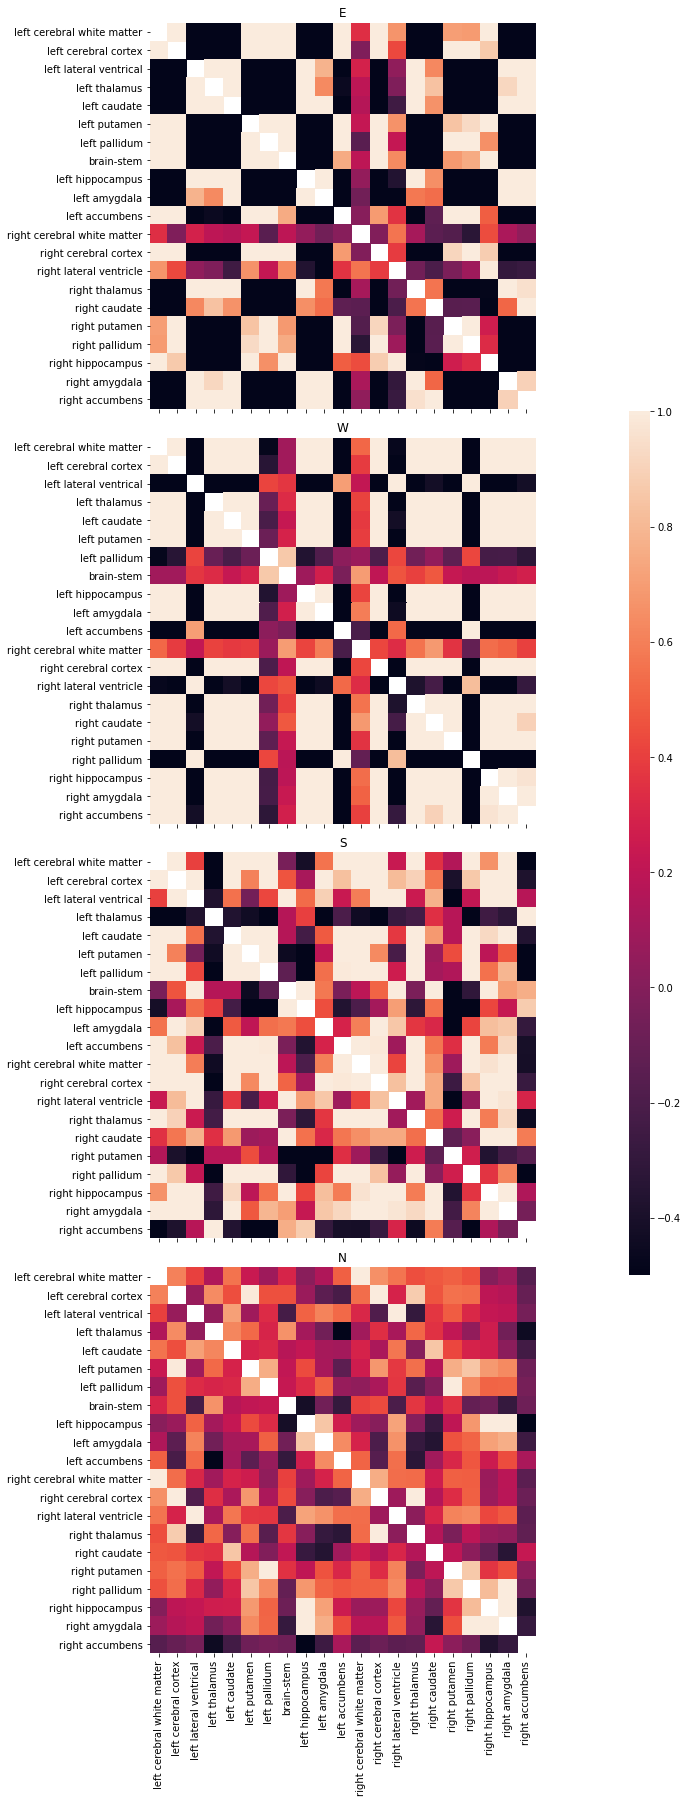

In [43]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=True, figsize=(10, 30),
                         gridspec_kw={'wspace': 0.025, 'hspace': 0.075})

cbar_ax = fig.add_axes([.91, .3, .03, .4])
r = 0
for trial_type, df in pd_dict.items():
    g = sns.heatmap(df, ax=axes[r], vmin=-.5, vmax=1., square=True,
                    cbar=True, cbar_ax=cbar_ax)
    axes[r].set_title(trial_type)
    # iterate over rows
    r += 1
plt.tight_layout()

Collect beta map results
========================


In [ ]:
# nii_dict = {}
# for trial_type in trial_types:
#     fname = filename_template.format(trial_type=trial_type, suffix='betaseries', ext='nii.gz')
#     file_path = os.path.join(output_path, fname)
#     nii_dict[trial_type] = nib.load(file_path)

# # view east beta_maps
# nib.viewers.OrthoSlicer3D(nii_dict['E'].get_fdata(),
#                           title="East Betas").set_position(28, -14, -10)



Graph beta map standard deviation
=================================
We can find where the betas have the highest standard deviation for each trial type.
Unsuprisingly, the largest deviations are near the edge of the brain mask and
the subcortical regions.


In [ ]:
# standard deviations for each trial type
# std_dict = {tt: nib.Nifti1Image(img.get_fdata().std(axis=-1), img.affine, img.header)
#             for tt, img in nii_dict.items()}

# fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

# for idx, (trial_type, nii) in enumerate(std_dict.items()):
#     plotting.plot_stat_map(nii, title=trial_type, cut_coords=(0, 0, 0),
#                            threshold=5, vmax=20, axes=axes[idx])